## xG value

In [54]:
# importing necessary libraries
import pandas as pd
import numpy as np
import json
from statsbombpy import sb
# plotting
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
# statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
#opening data
import os
import pathlib
import warnings 

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [55]:
#load data - store it in train dataframe
train_overall = pd.DataFrame()
train_overall = sb.matches(competition_id=9, season_id=281)

In [56]:
train_overall

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3895302,2024-04-14,17:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Werder Bremen,5,0,available,...,2024-05-10T17:03:59.613154,29,Regular Season,BayArena,Harm Osmers,Xabier Alonso Olano,Ole Werner,1.1.0,2,2
1,3895292,2024-04-06,15:30:00.000,Germany - 1. Bundesliga,2023/2024,Union Berlin,Bayer Leverkusen,0,1,available,...,2024-05-12T21:08:37.897296,28,Regular Season,Stadion An der Alten Försterei,Benjamin Brand,Nenad Bjelica,Xabier Alonso Olano,1.1.0,2,2
2,3895333,2024-05-05,18:30:00.000,Germany - 1. Bundesliga,2023/2024,Eintracht Frankfurt,Bayer Leverkusen,1,5,available,...,2024-05-14T16:32:13.483516,32,Regular Season,Deutsche Bank Park,Christian Dingert,Dino Toppmöller,Xabier Alonso Olano,1.1.0,2,2
3,3895340,2024-05-12,20:30:00.000,Germany - 1. Bundesliga,2023/2024,Bochum,Bayer Leverkusen,0,5,available,...,2024-05-14T16:46:08.459843,33,Regular Season,Vonovia Ruhrstadion,Benjamin Brand,Heiko Butscher,Xabier Alonso Olano,1.1.0,2,2
4,3895348,2024-05-18,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Augsburg,2,1,available,...,2024-05-20T10:33:09.140760,34,Regular Season,BayArena,Matthias Jöllenbeck,Xabier Alonso Olano,Jess Christian Thorup,1.1.0,2,2
5,3895286,2024-03-30,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Hoffenheim,2,1,available,...,2024-05-08T03:36:21.320065,27,Regular Season,BayArena,Deniz Aytekin,Xabier Alonso Olano,Pellegrino Matarazzo,1.1.0,2,2
6,3895220,2024-02-03,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Darmstadt 98,Bayer Leverkusen,0,2,available,...,2024-05-08T01:01:15.978489,20,Regular Season,Merck-Stadion am Böllenfalltor,Tobias Reichel,Torsten Lieberknecht,Xabier Alonso Olano,1.1.0,2,2
7,3895250,2024-02-23,21:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,FSV Mainz 05,2,1,available,...,2024-05-08T00:38:33.864825,23,Regular Season,BayArena,Timo Gerach,Xabier Alonso Olano,Bo Henriksen,1.1.0,2,2
8,3895266,2024-03-10,20:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Wolfsburg,2,0,available,...,2024-04-28T10:29:53.455142,25,Regular Season,BayArena,Daniel Siebert,Xabier Alonso Olano,Niko Kovač,1.1.0,2,2
9,3895275,2024-03-17,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Freiburg,Bayer Leverkusen,2,3,available,...,2024-04-19T22:39:18.935666,26,Regular Season,Europa-Park Stadion,Harm Osmers,Christian Streich,Xabier Alonso Olano,1.1.0,2,2


In [57]:
#i need all matches events data in a df
train = pd.DataFrame()
for match_id_value in train_overall['match_id']:
    events_data = sb.events(match_id=match_id_value)  
    train = pd.concat([train, events_data])

In [58]:
shots_overall = train.loc[train['type'] == 'Shot']
shots = shots_overall.loc[shots_overall['team_id'] == 904]

In [59]:
def eliminar_columnas_nan(df):
    return df.dropna(axis=1, how='all')

In [60]:
# Extract coordinates with correct scaling
shots["X"] = shots['location'].apply(lambda cell: cell[0])
shots["Y"] = shots['location'].apply(lambda cell: cell[1])

# Define successful and unsuccessful outcomes
successful_outcomes = ['Goal']
unsuccessful_outcomes = ['Blocked', 'Off T', 'Post', 'Saved', 'Wayward', 'Saved Off T', 'Saved To Post']

# Classify each shot as successful or not successful
shots['Goal'] = shots['shot_outcome'].apply(lambda x: 1 if x in successful_outcomes else 0)

In [61]:
clean_shots = eliminar_columnas_nan(shots)

In [62]:
clean_shots.drop('location', axis = 1, inplace = True)

In [63]:
clean_shots.drop('shot_outcome', axis = 1, inplace = True)

In [64]:
clean_shots.drop('team_id', axis = 1, inplace = True)

In [65]:
clean_shots.drop('match_id', axis = 1, inplace = True)

In [66]:
#under_pressure -> true = 1
#shot_statsbomb_xg
#team
#shot_end_location
#related_events

clean_shots.drop('related_events', axis = 1, inplace = True)

In [67]:
clean_shots.drop('player', axis = 1, inplace = True)

In [68]:
clean_shots["goal_x"] = clean_shots['shot_end_location'].apply(lambda cell: cell[0])
clean_shots["goal_y"] = clean_shots['shot_end_location'].apply(lambda cell: cell[1])
clean_shots["goal_z"] = clean_shots['shot_end_location'].apply(lambda cell: cell[2] if len(cell) > 2 else 0)

In [69]:
clean_shots["distance"] = clean_shots["X"].apply(lambda cell:120 - cell)

In [70]:
clean_shots

,duration,id,index,minute,off_camera,out,period,play_pattern,player_id,position,...,shot_open_goal,shot_saved_off_target,shot_saved_to_post,X,Y,Goal,goal_x,goal_y,goal_z,distance
4094,0.217872,bbc2c68d-c096-483d-abf4-32c0175a0f55,480,7,NaN,NaN,1,Regular Play,38004.0,Left Wing Back,...,NaN,NaN,NaN,114.6,33.5,0,118.1,35.7,0.2,5.4
4096,0.085298,b2c3d59d-3bef-4f8a-ad86-26b69940c64e,684,13,NaN,NaN,1,From Corner,8221.0,Center Back,...,NaN,NaN,NaN,113.9,47.4,0,114.1,46.8,0.0,6.1
4097,0.402989,bb53b537-1685-4019-9e8f-98f3805828eb,848,16,NaN,NaN,1,Regular Play,3500.0,Right Defensive Midfield,...,NaN,NaN,NaN,89.2,42.5,0,101.4,41.3,0.0,30.8
4098,1.732516,0247fb51-7bf7-4be6-82d7-bf63892bdd53,854,16,NaN,NaN,1,From Corner,8221.0,Center Back,...,NaN,NaN,NaN,110.2,32.6,0,116.4,38.1,0.0,9.8
4100,0.479048,cf7357c9-3bd6-425f-ac34-ef7f11897394,1193,24,NaN,NaN,1,Other,32289.0,Center Forward,...,NaN,NaN,NaN,108.0,40.0,1,120.0,42.9,1.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,0.287836,5df16513-d372-4a46-9661-09c10341a40b,2051,47,NaN,NaN,2,Regular Play,40724.0,Left Wing,...,NaN,NaN,NaN,110.6,35.0,0,118.0,36.6,1.3,9.4
3523,1.221804,c8521aea-0248-4c7c-9036-c103ff5e2416,2357,56,NaN,NaN,2,From Counter,32289.0,Center Forward,...,NaN,NaN,NaN,93.9,43.9,0,120.0,45.0,6.3,26.1
3524,1.234672,f8cd5da5-6a20-41ad-8794-4397b76a11cf,2661,63,NaN,NaN,2,From Throw In,40724.0,Left Wing,...,NaN,NaN,NaN,104.8,45.4,1,120.0,38.2,2.0,15.2
3531,0.878213,bcea08d2-3377-4014-a452-aec0bed0d80e,3422,86,NaN,NaN,2,Regular Play,32289.0,Left Center Forward,...,NaN,NaN,NaN,98.6,31.6,0,120.0,34.9,0.9,21.4


In [71]:
goals = clean_shots.loc[clean_shots['Goal']==1]

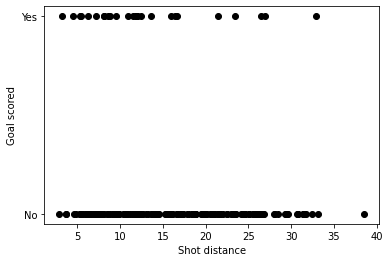

In [72]:
#first 200 shots
shots_200=clean_shots.iloc[:200]
#plot first 200 shots goal distance
fig, ax = plt.subplots()
ax.plot(shots_200['distance'], shots_200['Goal'], linestyle='none', marker= '.', markersize= 12, color='black')
#make legend
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot distance")
plt.ylim((-0.05,1.05))
ax.set_yticks([0,1])
ax.set_yticklabels(['No','Yes'])
plt.show()

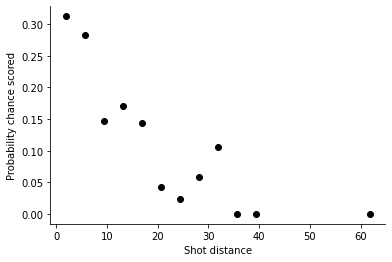

In [73]:
#number of shots from distance
shotcount_dist = np.histogram(clean_shots['distance'], bins=40, range=[0, 150])
#number of goals from distance
goalcount_dist = np.histogram(goals['distance'], bins=40, range=[0, 150])
np.seterr(divide='ignore', invalid='ignore')
#probability of scoring goal from a given distance
prob_goal = np.divide(goalcount_dist[0], shotcount_dist[0])
angle = shotcount_dist[1]
midangle = (angle[:-1] + angle[1:])/2
#make plot
fig,ax = plt.subplots()
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot distance")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Optimization terminated successfully.
         Current function value: 0.373431
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Goal   No. Observations:                  623
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                            1
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                 0.06966
Time:                        14:47:56   Log-Likelihood:                -232.65
converged:                       True   LL-Null:                       -250.07
Covariance Type:            nonrobust   LLR p-value:                 3.578e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4431      0.256     -1.730      0.084      -0.945       0.059
distance      -0.1022      0.

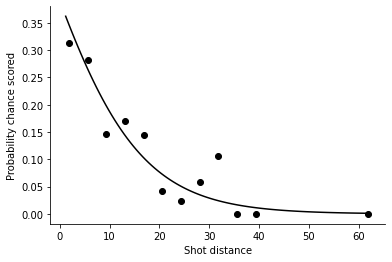

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit

#logistic regression model
logistic_model = logit(formula="Goal ~ distance", data=clean_shots).fit()
print(logistic_model.summary())

# model parameters
coefficients = logistic_model.params


distance_range = np.linspace(clean_shots['distance'].min(), clean_shots['distance'].max(), 100)

# Calculate the predicted probabilities using the logistic regression model
xGprob = logistic_model.predict(pd.DataFrame({'distance': distance_range}))

# Plotting the data points
fig, ax = plt.subplots()
ax.plot(midangle, prob_goal, linestyle='none', marker='.', markersize=12, color='black')

# Plot the logistic regression line (predicted probabilities)
ax.plot(distance_range, xGprob, linestyle='solid', color='black')

# Adding labels and customizing the plot
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot distance")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.show()

In [100]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 7.2 MB/s eta 0:00:0000:0100:01


In [115]:
clean_shots.columns

Index(['duration', 'id', 'index', 'minute', 'off_camera', 'out', 'period',
       'play_pattern', 'player_id', 'position', 'possession',
       'possession_team', 'possession_team_id', 'second', 'shot_aerial_won',
       'shot_body_part', 'shot_end_location', 'shot_first_time',
       'shot_freeze_frame', 'shot_key_pass_id', 'shot_one_on_one',
       'shot_statsbomb_xg', 'shot_technique', 'shot_type', 'team', 'timestamp',
       'type', 'under_pressure', 'shot_deflected', 'shot_open_goal',
       'shot_saved_off_target', 'shot_saved_to_post', 'X', 'Y', 'Goal',
       'goal_x', 'goal_y', 'goal_z', 'distance'],
      dtype='object')

In [101]:
from sklearn.model_selection import train_test_split, 

X = clean_shots["distance"]   # independant features
y = clean_shots["Goal"] 					# dependant variable

# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

3665    16.0
4339    24.5
3997     8.1
4057    14.1
3645     7.6
        ... 
3272    11.2
3749     9.8
4059    21.4
3839     8.8
3742    10.6
Name: distance, Length: 467, dtype: float64

Optimization terminated successfully.
         Current function value: 0.373440
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Goal   No. Observations:                  467
Model:                          Logit   Df Residuals:                      465
Method:                           MLE   Df Model:                            1
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                 0.06538
Time:                        16:34:18   Log-Likelihood:                -174.40
converged:                       True   LL-Null:                       -186.60
Covariance Type:            nonrobust   LLR p-value:                 7.833e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4992      0.294     -1.696      0.090      -1.076       0.078
distance      -0.0997      0.

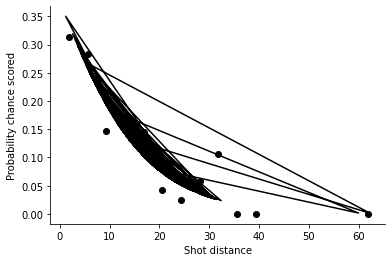

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit
df = pd.DataFrame({
    "distance": X_train, "Goal" : y_train
})

#logistic regression model
logistic_model = logit(formula="Goal ~ distance", data=df).fit()
print(logistic_model.summary())

# model parameters
coefficients = logistic_model.params


distance_range = np.linspace(X_test.min(), X_test.max(), 100)

# Calculate the predicted probabilities using the logistic regression model
xGprob = logistic_model.predict(pd.DataFrame({'distance': X_test}))



# Plotting the data points
fig, ax = plt.subplots()
ax.plot(midangle, prob_goal, linestyle='none', marker='.', markersize=12, color='black')

# Plot the logistic regression line (predicted probabilities)
ax.plot(X_test, xGprob, linestyle='solid', color='black')

# Adding labels and customizing the plot
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot distance")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.show()

In [107]:
xGprob.shape

(156,)

In [110]:
y_test.values

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [112]:
xGprob

4032    0.055129
3876    0.068362
4064    0.030789
4072    0.250268
3754    0.133011
          ...   
3672    0.066482
4071    0.060557
4320    0.155095
3662    0.120869
3770    0.050639
Length: 156, dtype: float64

In [114]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test.values, xGprob.values)

np.float64(0.11301453655617981)

In [121]:
clean_shots['shot_body_part'].value_counts()

shot_body_part
Right Foot    304
Left Foot     235
Head           83
Other           1
Name: count, dtype: int64

In [129]:
df_encoded = pd.get_dummies(clean_shots, columns=['shot_body_part'])

In [135]:
df_encoded = pd.get_dummies(df_encoded, columns=['play_pattern'])

In [137]:
df_encoded.drop('id', axis = 1, inplace = True)

In [138]:
df_encoded.columns

Index(['duration', 'index', 'minute', 'off_camera', 'out', 'period',
       'player_id', 'position', 'possession', 'possession_team',
       'possession_team_id', 'second', 'shot_aerial_won', 'shot_end_location',
       'shot_first_time', 'shot_freeze_frame', 'shot_key_pass_id',
       'shot_one_on_one', 'shot_statsbomb_xg', 'shot_technique', 'shot_type',
       'team', 'timestamp', 'type', 'under_pressure', 'shot_deflected',
       'shot_open_goal', 'shot_saved_off_target', 'shot_saved_to_post', 'X',
       'Y', 'Goal', 'goal_x', 'goal_y', 'goal_z', 'distance',
       'shot_body_part_Head', 'shot_body_part_Left Foot',
       'shot_body_part_Other', 'shot_body_part_Right Foot',
       'play_pattern_From Corner', 'play_pattern_From Counter',
       'play_pattern_From Free Kick', 'play_pattern_From Goal Kick',
       'play_pattern_From Keeper', 'play_pattern_From Kick Off',
       'play_pattern_From Throw In', 'play_pattern_Other',
       'play_pattern_Regular Play'],
      dtype='object

In [184]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Definir X e y
X = df_encoded[['X', 'Y', 'distance',
                'shot_body_part_Head', 'shot_body_part_Left Foot',
                'shot_body_part_Other', 'shot_body_part_Right Foot',
                'play_pattern_From Corner', 'play_pattern_From Counter',
                'play_pattern_From Free Kick', 'play_pattern_From Goal Kick',
                'play_pattern_From Keeper', 'play_pattern_From Kick Off',
                'play_pattern_From Throw In', 'play_pattern_Other',
                'play_pattern_Regular Play']]  
y = df_encoded["Goal"]  # Variable dependiente (0 o 1)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear un modelo XGBoost para clasificación
model = XGBClassifier(n_estimators=100, learning_rate=0.02, max_depth=6, random_state=42)


In [185]:
# Entrenar el modelo
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [186]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.86
Confusion Matrix:
[[133   1]
 [ 21   1]]


<BarContainer object of 16 artists>

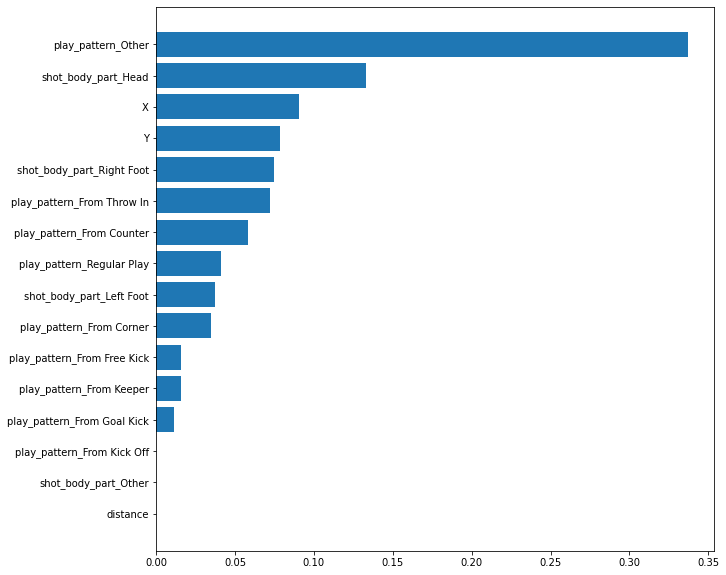

In [187]:
labels = X.columns
importances = model.feature_importances_
feat_imp = pd.DataFrame(
    {
        "features": labels,
        "importances": importances
    }
)

feat_imp = feat_imp.sort_values(by="importances")

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.barh(feat_imp["features"], feat_imp["importances"])

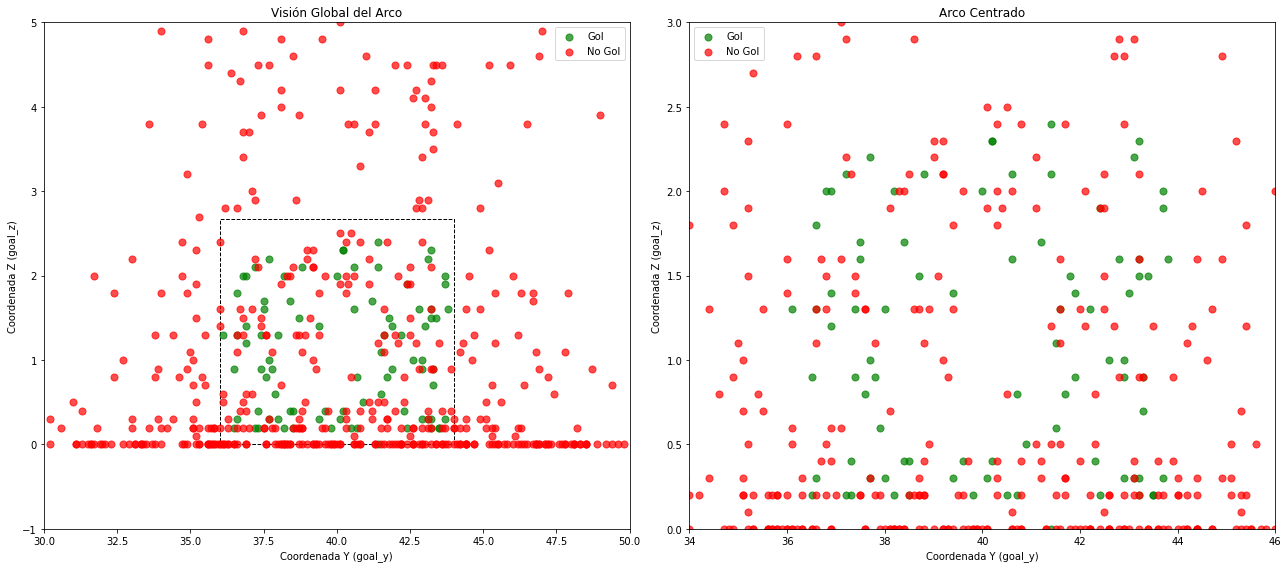

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd

def dibujar_arco(ax, centered=False):
    # Define the dimensions of the goal area
    goal_width = 8  # Width of the goal area in meters
    goal_height = 2.67  # Height of the goal area in meters
    x_start = 36  # Starting x-coordinate of the goal area
    x_end = 44  # Ending x-coordinate of the goal area

    if centered:
        x_start = 34  # Starting x-coordinate for centered view
        x_end = 46  # Ending x-coordinate for centered view

    # Add a rectangle to represent the goal area
    rect = patches.Rectangle((x_start, 0), goal_width, goal_height, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
    ax.add_patch(rect)

def dibujar_arco_sin(ax, centered=False):
    # Define the dimensions of the goal area
    goal_width = 8  # Width of the goal area in meters
    goal_height = 2.67  # Height of the goal area in meters



def scatterplot_tiros(df, ax):
    # Separate the data by goal outcome
    goals = df[df['Goal'] == 1]
    no_goals = df[df['Goal'] == 0]
    
    # Plot the shots that resulted in goals
    ax.scatter(goals['goal_y'], goals['goal_z'], color='green', label='Gol', s=50, alpha=0.7)
    
    # Plot the shots that did not result in goals
    ax.scatter(no_goals['goal_y'], no_goals['goal_z'], color='red', label='No Gol', s=50, alpha=0.7)
    
    ax.set_xlabel('Coordenada Y (goal_y)')
    ax.set_ylabel('Coordenada Z (goal_z)')
    ax.legend()

# Example usage
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plot global view
ax1.set_title('Visión Global del Arco')
dibujar_arco(ax1, centered=False)
scatterplot_tiros(clean_shots, ax1)
ax1.set_xlim(30, 50)
ax1.set_ylim(-1, 5)

# Plot centered view
ax2.set_title('Arco Centrado')
dibujar_arco_sin(ax2, centered=True)
scatterplot_tiros(clean_shots, ax2)
ax2.set_xlim(36, 44)
ax2.set_ylim(0, 3)

plt.tight_layout()
plt.show()

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

from mplsoccer import Pitch, FontManager, Sbopen

In [89]:
parser = Sbopen()
events, related, freeze, players = parser.event(3895232)
TEAM = 'Bayer Leverkusen'
OPPONENT = 'Bayern Munich'

In [90]:
events.loc[events.tactics_formation.notnull(), 'tactics_id'] = events.loc[
    events.tactics_formation.notnull(), 'id']
events[['tactics_id', 'tactics_formation']] = events.groupby('team_name')[[
    'tactics_id', 'tactics_formation']].ffill()

In [91]:
formation_dict = {1: 'GK', 2: 'RB', 3: 'RCB', 4: 'CB', 5: 'LCB', 6: 'LB', 7: 'RWB',
                  8: 'LWB', 9: 'RDM', 10: 'CDM', 11: 'LDM', 12: 'RM', 13: 'RCM',
                  14: 'CM', 15: 'LCM', 16: 'LM', 17: 'RW', 18: 'RAM', 19: 'CAM',
                  20: 'LAM', 21: 'LW', 22: 'RCF', 23: 'ST', 24: 'LCF', 25: 'SS'}
players['position_abbreviation'] = players.position_id.map(formation_dict)

In [92]:
sub = events.loc[events.type_name == 'Substitution',
                 ['tactics_id', 'player_id', 'substitution_replacement_id',
                  'substitution_replacement_name']]
players_sub = players.merge(sub.rename({'tactics_id': 'id'}, axis='columns'),
                            on=['id', 'player_id'], how='inner', validate='1:1')
players_sub = (players_sub[['id', 'substitution_replacement_id', 'position_abbreviation']]
               .rename({'substitution_replacement_id': 'player_id'}, axis='columns'))
players = pd.concat([players, players_sub])
players.rename({'id': 'tactics_id'}, axis='columns', inplace=True)
players = players[['tactics_id', 'player_id', 'position_abbreviation']]

In [93]:
# add on the position the player was playing in the formation to the events dataframe
events = events.merge(players, on=['tactics_id', 'player_id'], how='left', validate='m:1')
# add on the position the receipient was playing in the formation to the events dataframe
events = events.merge(players.rename({'player_id': 'pass_recipient_id'},
                                     axis='columns'), on=['tactics_id', 'pass_recipient_id'],
                      how='left', validate='m:1', suffixes=['', '_receipt'])

In [94]:
events.groupby('team_name').tactics_formation.unique()

team_name
Bayer Leverkusen    [3421, 343]
Bayern Munich       [3421, 442]
Name: tactics_formation, dtype: object

In [95]:
FORMATION = '3421'
pass_cols = ['id', 'position_abbreviation', 'position_abbreviation_receipt']
passes_formation = events.loc[(events.team_name == TEAM) & (events.type_name == 'Pass') &
                              (events.tactics_formation == FORMATION) &
                              (events.position_abbreviation_receipt.notnull()), pass_cols].copy()
location_cols = ['position_abbreviation', 'x', 'y']
location_formation = events.loc[(events.team_name == TEAM) &
                                (events.type_name.isin(['Pass', 'Ball Receipt'])) &
                                (events.tactics_formation == FORMATION), location_cols].copy()

# average locations
average_locs_and_count = (location_formation.groupby('position_abbreviation')
                          .agg({'x': ['mean'], 'y': ['mean', 'count']}))
average_locs_and_count.columns = ['x', 'y', 'count']

# calculate the number of passes between each position (using min/ max so we get passes both ways)
passes_formation['pos_max'] = (passes_formation[['position_abbreviation',
                                                'position_abbreviation_receipt']]
                               .max(axis='columns'))
passes_formation['pos_min'] = (passes_formation[['position_abbreviation',
                                                'position_abbreviation_receipt']]
                               .min(axis='columns'))
passes_between = passes_formation.groupby(['pos_min', 'pos_max']).id.count().reset_index()
passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

# add on the location of each player so we have the start and end positions of the lines
passes_between = passes_between.merge(average_locs_and_count, left_on='pos_min', right_index=True)
passes_between = passes_between.merge(average_locs_and_count, left_on='pos_max', right_index=True,
                                      suffixes=['', '_end'])

In [96]:
MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
passes_between['width'] = (passes_between.pass_count / passes_between.pass_count.max() *
                           MAX_LINE_WIDTH)
average_locs_and_count['marker_size'] = (average_locs_and_count['count']
                                         / average_locs_and_count['count'].max() * MAX_MARKER_SIZE)

In [97]:
MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('white'))
color = np.tile(color, (len(passes_between), 1))
c_transparency = passes_between.pass_count / passes_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

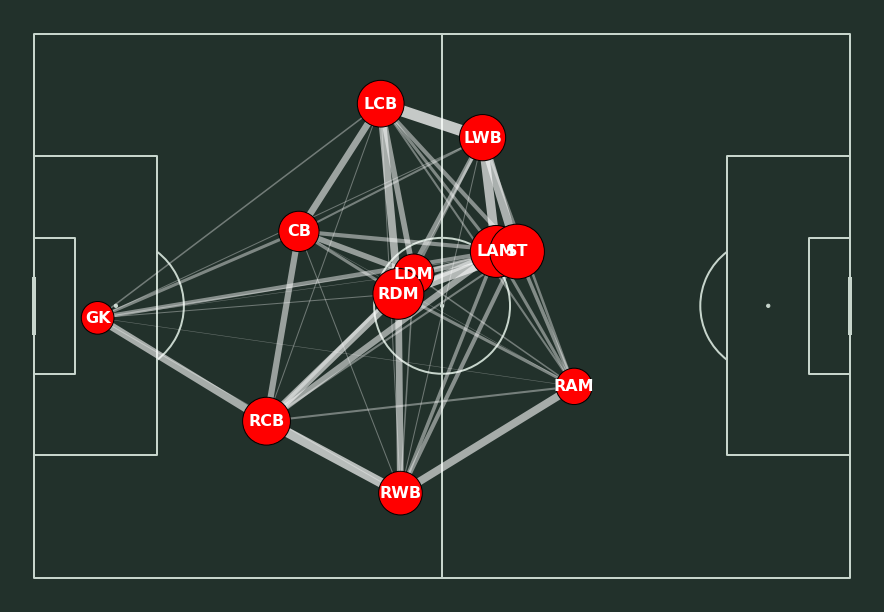

In [98]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor("#22312b")
pass_lines = pitch.lines(passes_between.x, passes_between.y,
                         passes_between.x_end, passes_between.y_end, lw=passes_between.width,
                         color=color, zorder=1, ax=ax)
pass_nodes = pitch.scatter(average_locs_and_count.x, average_locs_and_count.y,
                           s=average_locs_and_count.marker_size,
                           color='red', edgecolors='black', linewidth=1, alpha=1, ax=ax)
for index, row in average_locs_and_count.iterrows():
    pitch.annotate(row.name, xy=(row.x, row.y), c='white', va='center',
                   ha='center', size=16, weight='bold', ax=ax)